# Required dependencies

In [1]:
import model
from stable_baselines import PPO2

import time
from utils import make_vec_envs

%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



# Defining the parameters and loading the model and environment

In [2]:
game = 'rts'
representation = 'turtle'
model_path = 'models/{}/{}/model_1.pkl'.format(game, representation)
kwargs = {
    'change_percentage': 0.4,
    'verbose': True
}

if game == "binary":
    model.FullyConvPolicy = model.FullyConvPolicyBigMap
elif game == "zelda":
    model.FullyConvPolicy = model.FullyConvPolicyBigMap
elif game == "sokoban" or game == "rts":
    model.FullyConvPolicy = model.FullyConvPolicySmallMap

agent = PPO2.load(model_path)

env_name = '{}-{}-v0'.format(game, representation)
if game == "binary":
    kwargs['cropped_size'] = 28
elif game == "zelda":
    kwargs['cropped_size'] = 22
elif game == "sokoban" or game == "rts":
    kwargs['cropped_size'] = 10
    
env = make_vec_envs(env_name, representation, None, 1, **kwargs)

Loading a model without an environment, this model cannot be trained until it has a valid environment.









Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where





/Users/puyihao/.conda/envs/pcgrl/lib/python3.5/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


# Run Model

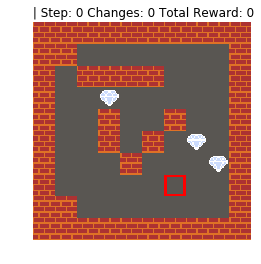

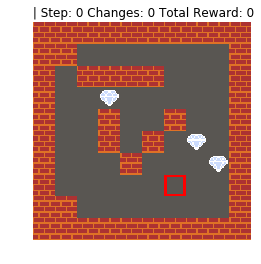

In [5]:
def show_state(env, step=0, changes=0, total_reward=0, name=""):
    fig = plt.figure(10)
    plt.clf()
    plt.title("{} | Step: {} Changes: {} Total Reward: {}".format(name, step, changes, total_reward))
    plt.axis('off')
    plt.imshow(env.render(mode='rgb_array'))
    display.clear_output(wait=True)
    display.display(plt.gcf())
    
def infer(env, agent, **kwargs):
    obs = env.reset()
    dones = False
    total_rewards = 0
    while not dones:
        action, _ = agent.predict(obs)
        obs, rewards, dones, info = env.step(action)
        total_rewards += rewards
#         show_state(env, info[0]['iterations'], info[0]['changes'], total_rewards)
        if dones:
            break
        show_state(env, info[0]['iterations'], info[0]['changes'], total_rewards)
    if kwargs.get('verbose', False):
        print(info[0])
    return env

env = infer(env, agent, **kwargs)
show_state(env)